(512, 512)


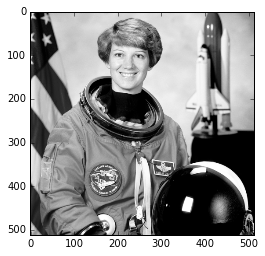

In [16]:
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

from skimage import data
from skimage import color
from skimage.util.shape import view_as_blocks


# -- get `astronaut` from skimage.data in grayscale
l = color.rgb2gray(data.astronaut())
plt.imshow(l, cmap='Greys_r')
print (l.shape)

(128, 128)


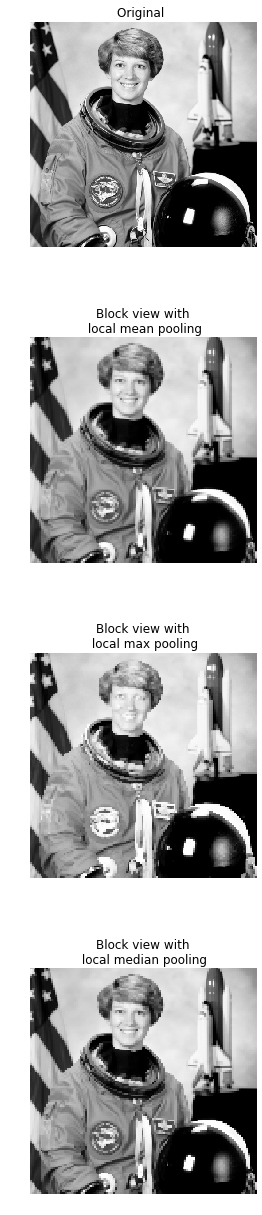

In [25]:
# -- size of blocks
block_shape = (4, 4)

# -- see `astronaut` as a matrix of blocks (of shape
#    `block_shape`)
view = view_as_blocks(l, block_shape)

# -- collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

# -- resampling `astronaut` by taking either the `mean`,
#    the `max` or the `median` value of each blocks.
mean_view = np.mean(flatten_view, axis=2)
print (mean_view.shape)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)



# -- display resampled images
#fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
#ax0, ax1, ax2, ax3 = axes.ravel()
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(21, 21))

ax0.set_title("Original ")
#l_resized = ndi.zoom(l, 2, order=3)
#ax0.imshow(l_resized, cmap=cm.Greys_r)
ax0.imshow(l, extent=(0, 128, 128, 0), interpolation='nearest', cmap=cm.Greys_r)
ax0.set_axis_off()

ax1.set_title("Block view with\n local mean pooling")
ax1.imshow(mean_view, interpolation='nearest', cmap=cm.Greys_r)
ax1.set_axis_off()

ax2.set_title("Block view with\n local max pooling")
ax2.imshow(max_view, interpolation='nearest', cmap=cm.Greys_r)
ax2.set_axis_off()

ax3.set_title("Block view with\n local median pooling")
ax3.imshow(median_view, interpolation='nearest', cmap=cm.Greys_r)
ax3.set_axis_off()

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()